In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [137]:
df = pd.read_csv('hw_files_bank_mkt/bank-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [138]:
df.shape

(45211, 17)

In [139]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [140]:
X = df.drop('y', axis= 1)
y = df['y']

In [141]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,test_size=0.2, random_state= 42)
X_train,X_val,y_train,y_val = train_test_split(X_train_full,y_train_full,test_size=0.25, random_state=42)
print(len(X_train),len(X_test), len(X_val))
print(len(y_train),len(y_test), len(y_val))

27126 9043 9042
27126 9043 9042


In [117]:
X.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [118]:
numerical = X.select_dtypes(exclude='object').columns
numerical

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [120]:
df_num = df[numerical]
df_num

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


## Question 1

ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `balance`
- `day`
- `duration`
- `previous`

In [121]:
df_num

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [133]:
from sklearn.model_selection import train_test_split
train_num = df_num
test_num = df['y'].replace({'yes':1,'no':0})

X_train, X_test, y_train, y_test = train_test_split(train_num, test_num, test_size=0.2, random_state=42)

print(len(X_train), len(X_test))

36168 9043


In [135]:
# Initialize a dictionary to store AUC scores
auc_scores = {}

# Calculate AUC for each numerical variable
for feature in df_num.columns:
    # Compute AUC
    auc = roc_auc_score(y_train, X_train[feature])
    
    # Check if AUC is less than 0.5
    if auc < 0.5:
        # Negate the feature for the score
        auc = roc_auc_score(y_train, -X_train[feature])
    
    # Store the AUC score
    auc_scores[feature] = auc

# Find the feature with the highest AUC
highest_auc_feature = max(auc_scores, key=auc_scores.get)
highest_auc_value = auc_scores[highest_auc_feature]

# Print the AUC scores and the feature with the highest AUC
print("AUC Scores:", auc_scores)
print(f"The numerical variable with the highest AUC is '{highest_auc_feature}' with an AUC of {highest_auc_value:.4f}.")


AUC Scores: {'age': 0.5069863876076055, 'balance': 0.5883044572068591, 'day': 0.5240080177298183, 'duration': 0.8085132925206949, 'campaign': 0.5698270084969785, 'pdays': 0.5951865866090812, 'previous': 0.6044039768702882}
The numerical variable with the highest AUC is 'duration' with an AUC of 0.8085.


## Question 2 
Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.69
- 0.79
- 0.89
- 0.99

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
train =  df.drop('y', axis= 1)
test = df['y'].map({'yes': 1, 'no': 0})

In [13]:
char = train.select_dtypes(include='object')
char

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown
45208,retired,married,secondary,no,no,no,cellular,nov,success
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown


In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output = False)
transformed_char = ohe.fit_transform(char)
df_char = pd.DataFrame(transformed_char, columns = ohe.get_feature_names_out())
df_char

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
train = pd.concat([df_char,df_num], axis = 1)
train.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,58,2143,5,261,1,-1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,44,29,5,151,1,-1,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,33,2,5,76,1,-1,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,47,1506,5,92,1,-1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,33,1,5,198,1,-1,0


In [77]:
from sklearn.model_selection import train_test_split

X_full_train, X_test, y_full_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_full_train,y_full_train, test_size=0.25, random_state=42)

print(len(X_train), len(X_test), len(X_val))


27126 9043 9042


In [78]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_val_pred = log_reg.predict(X_val)

# accuracy score
from sklearn.metrics import accuracy_score
print('val_accuracy :', round(accuracy_score(y_val, y_val_pred),3))

# AUC score
from sklearn.metrics import roc_auc_score
print('val_AUC :', round(roc_auc_score(y_val, y_val_pred),3))

val_accuracy : 0.9
val_AUC : 0.659


## Question 3: Precision and Recall
Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.265
* 0.465
* 0.665
* 0.865

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


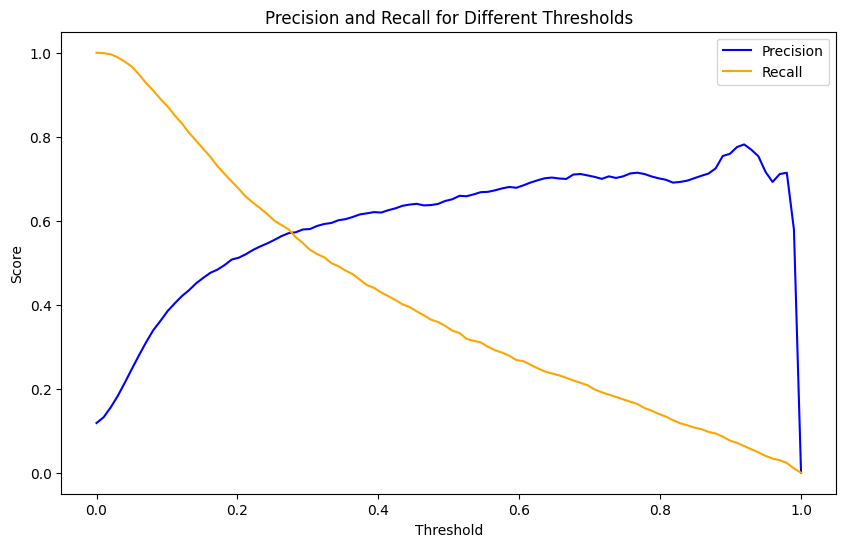

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Initialize an empty list to store scores
scores = []

# Define thresholds from 0 to 1
thresholds = np.linspace(0, 1, 100)

# Get predicted probabilities for the positive class
y_val_pred = log_reg.predict_proba(X_val)[:, 1]

# Initialize lists to hold precision and recall values
precision_values = []
recall_values = []

# Iterate through each threshold
for t in thresholds:
    y_pred = np.zeros(len(y_val_pred), dtype=int)
    y_pred[y_val_pred >= t] = 1  

    # Calculate precision and recall
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)

    # Append the precision and recall to the respective lists
    precision_values.append(precision)
    recall_values.append(recall)

# Convert precision and recall lists to numpy arrays for easier plotting
precision_values = np.array(precision_values)
recall_values = np.array(recall_values)

# Plotting Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_values, label='Precision', color='blue')
plt.plot(thresholds, recall_values, label='Recall', color='orange')
plt.title('Precision and Recall for Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

## Question 4
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.02
- 0.22
- 0.42
- 0.62

In [80]:
precision_values = np.array(precision_values)
recall_values = np.array(recall_values)

f1_scores = (2 * precision_values * recall_values) /(precision_values + recall_values)
f1_scores = np.nan_to_num(f1_scores)

/var/folders/yj/2fr85zvn2sbbpv3jsq4y3kwh0000gn/T/ipykernel_10264/1908346679.py:4: RuntimeWarning: invalid value encountered in divide
  f1_scores = (2 * precision_values * recall_values) /(precision_values + recall_values)


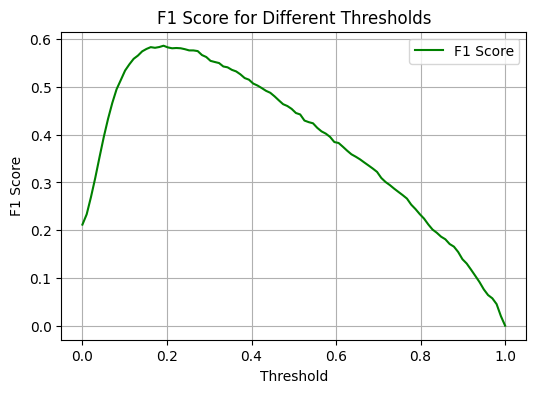

In [83]:
# Plotting F1 Score against Thresholds
plt.figure(figsize=(6, 4))
plt.plot(thresholds, f1_scores, label='F1 Score', color='green')
plt.title('F1 Score for Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()
plt.grid()
plt.show()

## Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.26

In [89]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

auc_scores = []
for train_index, val_index in kfold.split(X_full_train):
    X_train, X_val = X_full_train.iloc[train_index], X_full_train.iloc[val_index]
    y_train, y_val = y_full_train.iloc[train_index], y_full_train.iloc[val_index]

    log_reg = LogisticRegression(solver='liblinear',C = 1.0, max_iter=1000)
    log_reg.fit(X_train, y_train)
    y_val_pred = log_reg.predict_proba(X_val)[:, 1]
    auc_scores.append(roc_auc_score(y_val, y_val_pred))


print(np.std(auc_scores))

0.0069543321739620675


## Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

In [103]:
# Different values of C to test
C = [0.000001, 0.001, 1]

# Intialise K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Dictionary to hold AUC scores for each C
auc_scores = {c: [] for c in C}

for train_index, val_index in kfold.split(X_full_train):
    for c in C:
        X_train, X_val = X_full_train.iloc[train_index], X_full_train.iloc[val_index]
        y_train, y_val = y_full_train.iloc[train_index], y_full_train.iloc[val_index]

        log_reg = LogisticRegression(solver='liblinear',C = c, max_iter=1000)
        log_reg.fit(X_train, y_train)
        y_val_pred = log_reg.predict_proba(X_val)[:, 1]
        score = roc_auc_score(y_val, y_val_pred)
        auc_scores[c].append(score)

print('auc_scores:',auc_scores)

auc_scores: {1e-06: [0.7014669258646287, 0.6942160878211137, 0.7093797948800775, 0.6859899190185591, 0.6845491650285278], 0.001: [0.8689109703160294, 0.8699230859346838, 0.8682801935204422, 0.8542522923050804, 0.867622407408034], 1: [0.9112179680126994, 0.9050861885108019, 0.9063376843619918, 0.8949139212235401, 0.9156316223382359]}


In [106]:
mean_auc_scores = {key: round(np.mean(scores),4) for key, scores in auc_scores.items()}
print('mean_auc_scores:',mean_auc_scores)

mean_auc_scores: {1e-06: 0.6951, 0.001: 0.8658, 1: 0.9066}
